# Adjacency matrices 
A quick way to look at:
- the average adjacency matrix of our lamina circuits 
- the variance of each type of synaptic connection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

from vis.hex_lattice import hexplot
from vis.fig_tools import linear_cmap, subtype_cm

In [2]:
tp = '200914'
cx = pd.read_pickle(f'~/Data/{tp}_lamina/{tp}_cxdf.pickle')
subtypes = np.unique([*cx["pre_type"], *cx["post_type"]])

adj_mn = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type')
display(adj_mn.round(decimals=1))
adj_var = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.var)
display((adj_var).round(decimals=1))
adj_sd = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.std)
display(adj_sd.round(decimals=1))

# post_sd_sum = (adj_var**0.5).sum(axis=0)
# display(post_sd_sum)

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.1,0.5,0.7,0.1,0.1,0.0,0.1,0.0,0.1,0.5,0.4,0.1
LMC_2,21.3,5.0,13.6,13.8,0.2,0.1,1.6,0.1,2.0,4.2,2.6,3.9
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.6,1.3,3.1,0.3,0.1,0.3,0.1,0.3,0.0,0.3,0.1,0.4
R1R4,35.3,42.9,19.7,4.2,1.1,0.2,5.5,1.0,0.2,2.6,0.3,12.8
R2R5,35.2,53.2,37.2,13.3,0.8,0.6,2.8,0.3,0.9,12.5,1.1,33.1
R3R6,33.2,41.3,20.4,4.7,1.7,0.8,4.5,0.3,0.1,2.6,0.2,11.2
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.2,1.0,1.2,0.2,0.1,0.0,0.1,0.0,0.1,1.0,1.0,0.1
LMC_2,39.5,18.3,39.9,88.0,0.6,0.1,4.8,0.2,4.9,14.3,4.0,17.2
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,14.8,2.2,10.9,0.6,0.1,0.5,0.2,0.5,0.0,0.3,0.1,1.0
R1R4,81.0,72.8,79.8,16.4,2.7,0.4,5.3,2.1,0.3,5.0,0.3,50.3
R2R5,40.9,95.5,66.8,93.3,2.4,0.8,4.5,0.2,2.4,28.7,2.8,109.1
R3R6,76.2,58.6,64.2,16.6,3.2,1.0,5.0,0.7,0.2,4.5,0.3,52.6
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.4,1.0,1.1,0.4,0.3,0.0,0.4,0.0,0.4,1.0,1.0,0.4
LMC_2,6.3,4.3,6.3,9.4,0.8,0.3,2.2,0.4,2.2,3.8,2.0,4.1
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.9,1.5,3.3,0.8,0.4,0.7,0.4,0.7,0.0,0.6,0.3,1.0
R1R4,9.0,8.5,8.9,4.1,1.6,0.6,2.3,1.5,0.5,2.2,0.5,7.1
R2R5,6.4,9.8,8.2,9.7,1.5,0.9,2.1,0.5,1.6,5.4,1.7,10.4
R3R6,8.7,7.7,8.0,4.1,1.8,1.0,2.2,0.8,0.4,2.1,0.5,7.3
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
ctype_order = ['R1R4', 'R2R5', 'R3R6', 'R7', 'R8', 'R7p', 'LMC_1', 'LMC_2', 'LMC_3', 'LMC_4', 'LMC_N', 'centri']
ordered_mn = adj_mn.reindex(ctype_order).reindex(ctype_order, axis=1)
ordered_sd = adj_sd.reindex(ctype_order).reindex(ctype_order, axis=1)

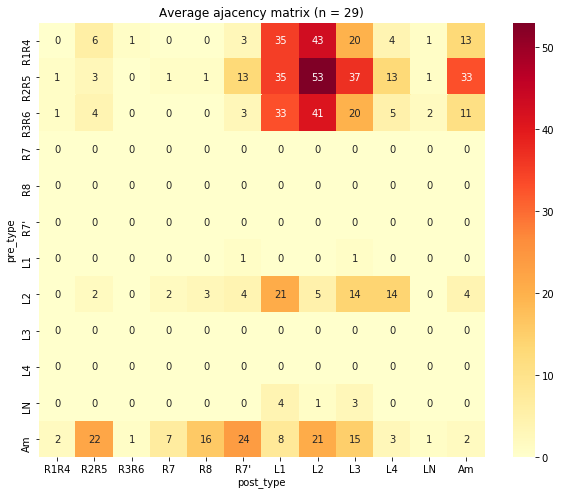

In [7]:
fig, ax = plt.subplots(1, figsize=(10, 8))

labels = ['R1R4', 'R2R5', 'R3R6', 'R7', 'R8', "R7'", 'L1', 'L2', 'L3', 'L4', 'LN', 'Am']

sns.heatmap(ordered_mn.round(), annot=True, ax=ax,cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
ax.set_title('Average ajacency matrix (n = 29)')
fig.savefig("/mnt/home/nchua/Dropbox/200615_mean-adj-order.pdf")

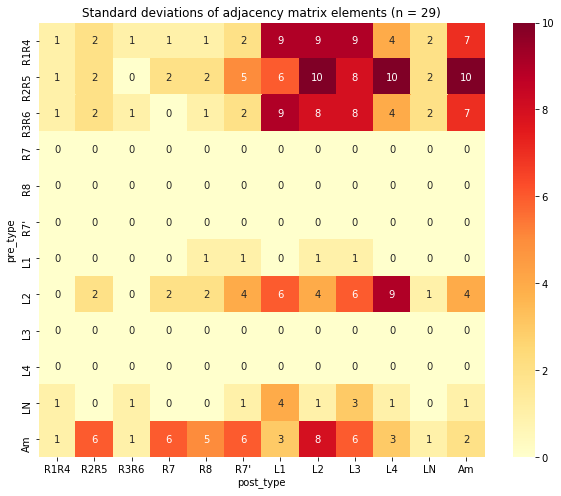

In [8]:
fig, ax = plt.subplots(1, figsize=(10, 8))

sns.heatmap(ordered_sd.round(), annot=True, ax=ax,cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
ax.set_title('Standard deviations of adjacency matrix elements (n = 29)')
fig.savefig("/mnt/home/nchua/Dropbox/200615_sd-adj-order.pdf")

In [9]:
# Individial ommatidia
ommatidia = np.unique(cx['om']).astype(str)
display(ommatidia)
adj_mats = dict.fromkeys(ommatidia)
adj_err = dict.fromkeys(ommatidia)
post_sd = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.var)
for o in ommatidia:
    adj_mats[o] = pd.pivot_table(cx.loc[cx['om'] == o], values='n_connect', index='pre_type', columns='post_type')
    adj_err[o] = adj_mats[o] - adj_mn.round(decimals=0)
    
    display(f"Ommatidium {o}")
    display(adj_mats[o])
#     display("~~Error relative to SD~~")
#     display((adj_err[o]/adj_sd).round(decimals=2))

    display(f"~"*80)

array(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'B0', 'B1', 'B2', 'B3', 'B4',
       'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'E4', 'E5', 'E6', 'E7'], dtype='<U2')

'Ommatidium A0'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,20.0,0.0,3.0,18.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,6.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
R1R4,38.0,36.0,24.0,7.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,15.0
R2R5,38.0,48.0,39.0,22.0,1.0,1.0,8.0,1.0,0.0,5.0,3.0,37.0
R3R6,46.0,31.0,22.0,12.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-0.16,-1.17,-1.74,0.43,0.00,0.00,-0.91,0.00,-0.45,0.53,-1.51,0.48
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.26,-0.67,0.30,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,1.02
R1R4,0.33,-0.82,0.45,0.74,-0.61,0.00,-1.31,0.00,0.00,-0.89,0.00,0.28
R2R5,0.47,-0.51,0.24,0.93,0.00,0.00,2.36,2.12,-0.64,-1.49,1.19,0.38
R3R6,1.49,-1.31,0.25,1.72,0.00,0.00,-0.90,0.00,0.00,-0.94,0.00,0.00
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A1'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,33.0,12.0,12.0,33.0,0.0,1.0,6.0,0.0,1.0,10.0,4.0,1.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,4.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
R1R4,42.0,57.0,22.0,7.0,1.0,0.0,4.0,0.0,0.0,4.0,0.0,9.0
R2R5,39.0,60.0,32.0,27.0,1.0,0.0,3.0,1.0,0.0,18.0,2.0,30.0
R3R6,40.0,43.0,18.0,9.0,0.0,0.0,4.0,0.0,0.0,7.0,0.0,3.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,1.91,1.64,-0.32,2.03,0.00,3.88,1.82,0.00,-0.45,1.58,0.50,-0.72
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,0.00,1.35,1.52,0.00,0.00,0.00,0.00,0.00,NaN,3.62,0.00,1.02
R1R4,0.78,1.64,0.22,0.74,0.00,0.00,-0.87,-0.68,0.00,0.45,0.00,-0.56
R2R5,0.63,0.72,-0.61,1.45,0.00,-1.10,0.00,2.12,-0.64,0.93,0.60,-0.29
R3R6,0.80,0.26,-0.25,0.98,-1.12,-1.01,0.00,0.00,0.00,1.88,0.00,-1.10
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A2'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,18.0,5.0,13.0,21.0,0.0,0.0,4.0,0.0,0.0,10.0,4.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
R1R4,31.0,42.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
R2R5,27.0,53.0,35.0,15.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,11.0
R3R6,30.0,47.0,15.0,3.0,0.0,2.0,3.0,0.0,0.0,6.0,2.0,0.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-0.48,0.00,-0.16,0.75,0.00,0.00,0.91,0.00,-0.90,1.58,0.50,-0.96
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.26,0.00,-0.30,0.00,0.00,0.00,0.00,0.00,NaN,0.00,3.23,0.00
R1R4,-0.44,-0.12,-0.90,-0.49,-0.61,0.00,-2.18,-0.68,0.00,0.00,0.00,-1.83
R2R5,-1.25,0.00,-0.24,0.21,-0.65,-1.10,-1.42,0.00,-0.64,-0.93,0.00,-2.11
R3R6,-0.34,0.78,-0.62,-0.49,-1.12,1.01,-0.45,0.00,0.00,1.41,3.71,-1.52
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A3'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,24.0,4.0,16.0,17.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,7.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,4.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,33.0,44.0,17.0,8.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,28.0
R2R5,40.0,74.0,36.0,21.0,0.0,1.0,1.0,0.0,0.0,16.0,2.0,52.0
R3R6,38.0,48.0,22.0,3.0,2.0,0.0,5.0,0.0,2.0,5.0,2.0,26.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,0.48,-0.23,0.32,0.32,0.00,0.00,-0.91,0.00,-0.90,0.00,-1.00,0.72
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,0.00,-0.67,-0.30,2.63,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,-0.22,0.12,-0.34,0.99,-0.61,0.00,-0.44,-0.68,0.00,0.89,0.00,2.11
R2R5,0.78,2.15,-0.12,0.83,-0.65,0.00,-0.95,0.00,-0.64,0.56,0.60,1.82
R3R6,0.57,0.91,0.25,-0.49,0.00,-1.01,0.45,0.00,4.89,0.94,3.71,2.07
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,26.0,1.0,17.0,25.0,4.0,0.0,0.0,0.0,2.0,6.0,1.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
R1R4,36.0,44.0,15.0,6.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,10.0
R2R5,35.0,55.0,46.0,18.0,4.0,0.0,2.0,0.0,2.0,11.0,0.0,27.0
R3R6,33.0,34.0,24.0,7.0,5.0,0.0,6.0,0.0,0.0,2.0,0.0,3.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,0.80,-0.93,0.47,1.17,5.27,0.00,-0.91,0.00,0.00,0.53,-1.00,-0.24
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.52,0.67,0.00,0.00,0.00,0.00,0.00,1.39,NaN,0.00,0.00,1.02
R1R4,0.11,0.12,-0.56,0.49,-0.61,0.00,-0.87,-0.68,0.00,0.89,0.00,-0.42
R2R5,0.00,0.20,1.10,0.52,1.95,-1.10,-0.47,0.00,0.64,-0.37,-0.60,-0.57
R3R6,0.00,-0.91,0.50,0.49,1.69,-1.01,0.90,0.00,0.00,-0.47,0.00,-1.10
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium A5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,20.0,5.0,5.0,16.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,8.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,35.0,38.0,11.0,4.0,1.0,0.0,9.0,1.0,0.0,0.0,0.0,16.0
R2R5,39.0,59.0,23.0,26.0,5.0,1.0,2.0,0.0,6.0,9.0,0.0,44.0
R3R6,27.0,31.0,11.0,2.0,6.0,1.0,10.0,0.0,0.0,2.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-0.16,0.00,-1.42,0.21,0.00,0.00,0.00,0.00,0.45,-0.26,-1.00,0.96
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-1.04,-0.67,-0.91,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,0.00,-0.59,-1.01,0.00,0.00,0.00,1.31,0.00,0.00,-1.34,0.00,0.42
R2R5,0.63,0.61,-1.71,1.35,2.60,0.00,-0.47,0.00,3.21,-0.75,-0.60,1.05
R3R6,-0.69,-1.31,-1.12,-0.74,2.25,0.00,2.69,0.00,0.00,-0.47,0.00,0.00
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B0'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,24.0,3.0,4.0,0.0,0.0,0.0,6.0,0.0,3.0,18.0,7.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,66.0,36.0,16.0,0.0,1.0,3.0,7.0,0.0,0.0,2.0,0.0,1.0
R2R5,34.0,58.0,34.0,0.0,2.0,3.0,5.0,0.0,0.0,26.0,1.0,17.0
R3R6,56.0,53.0,24.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,1.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,0.48,-0.47,-1.58,-1.49,0.00,0.00,1.82,0.00,0.45,3.70,2.01,-0.24
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-1.04,-0.67,-0.91,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,3.44,-0.82,-0.45,-0.99,0.00,4.84,0.44,-0.68,0.00,-0.45,0.00,-1.69
R2R5,-0.16,0.51,-0.37,-1.35,0.65,2.20,0.95,0.00,-0.64,2.43,0.00,-1.53
R3R6,2.63,1.57,0.50,-1.23,-1.12,-1.01,0.45,0.00,0.00,-0.47,0.00,-1.38
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B1'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,18.0,1.0,5.0,9.0,0.0,0.0,2.0,0.0,1.0,6.0,4.0,18.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,2.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
R1R4,40.0,31.0,32.0,15.0,2.0,0.0,7.0,2.0,0.0,1.0,1.0,29.0
R2R5,40.0,35.0,33.0,5.0,0.0,2.0,5.0,0.0,0.0,25.0,7.0,52.0
R3R6,29.0,29.0,32.0,17.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,24.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-0.48,-0.93,-1.42,-0.53,0.00,0.00,0.00,0.00,-0.45,0.53,0.50,3.37
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.52,0.67,0.61,0.00,0.00,1.42,2.27,0.00,NaN,1.81,0.00,1.02
R1R4,0.56,-1.41,1.34,2.72,0.61,0.00,0.44,0.68,0.00,-0.89,1.85,2.26
R2R5,0.78,-1.84,-0.49,-0.83,-0.65,1.10,0.95,0.00,-0.64,2.24,3.58,1.82
R3R6,-0.46,-1.57,1.50,2.95,-1.12,1.01,0.45,0.00,0.00,-0.94,0.00,1.79
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B2'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
LMC_2,25.0,0.0,9.0,17.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,1.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,16.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
R1R4,32.0,37.0,17.0,1.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0,17.0
R2R5,30.0,56.0,31.0,23.0,0.0,0.0,4.0,0.0,0.0,14.0,0.0,33.0
R3R6,29.0,43.0,24.0,6.0,1.0,2.0,2.0,0.0,0.0,4.0,0.0,14.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,1.01,0.93,2.27,0.00,NaN,0.00,NaN,0.00,-0.98,0.98,0.00
LMC_2,0.64,-1.17,-0.79,0.32,0.00,0.00,-0.46,0.00,-0.90,-0.53,0.50,-0.72
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,3.12,0.67,-0.61,0.00,0.00,0.00,2.27,0.00,NaN,0.00,0.00,0.00
R1R4,-0.33,-0.70,-0.34,-0.74,-0.61,0.00,-0.44,-0.68,0.00,1.34,0.00,0.56
R2R5,-0.78,0.31,-0.73,1.04,-0.65,-1.10,0.47,0.00,-0.64,0.19,-0.60,0.00
R3R6,-0.46,0.26,0.50,0.25,-0.56,1.01,-0.90,0.00,0.00,0.47,0.00,0.41
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B3'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
LMC_2,21.0,4.0,17.0,23.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
R1R4,30.0,50.0,9.0,9.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,4.0
R2R5,31.0,47.0,42.0,21.0,5.0,0.0,3.0,0.0,0.0,21.0,0.0,15.0
R3R6,31.0,37.0,17.0,5.0,4.0,0.0,6.0,0.0,0.0,1.0,0.0,2.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,0.93,4.53,0.00,NaN,2.85,NaN,0.00,0.00,0.98,0.00
LMC_2,0.00,-0.23,0.47,0.96,0.00,0.00,-0.91,0.00,-0.45,-0.26,1.00,-0.96
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.52,-0.67,0.61,0.00,0.00,0.00,0.00,0.00,NaN,1.81,0.00,0.00
R1R4,-0.56,0.82,-1.23,1.23,-0.61,0.00,-0.44,-0.68,0.00,-0.45,0.00,-1.27
R2R5,-0.63,-0.61,0.61,0.83,2.60,-1.10,0.00,0.00,-0.64,1.49,-0.60,-1.72
R3R6,-0.23,-0.52,-0.37,0.00,1.12,-1.01,0.90,0.00,0.00,-0.94,0.00,-1.24
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,30.0,8.0,23.0,16.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,5.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
R1R4,20.0,41.0,17.0,6.0,1.0,1.0,5.0,0.0,0.0,4.0,0.0,8.0
R2R5,34.0,61.0,58.0,25.0,0.0,1.0,0.0,0.0,0.0,11.0,0.0,30.0
R3R6,27.0,40.0,15.0,9.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,7.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,1.43,0.70,1.42,0.21,0.00,0.00,-0.91,0.00,-0.90,0.00,-1.51,-0.48
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,0.26,0.00,0.91,0.00,0.00,0.00,0.00,1.39,NaN,1.81,0.00,1.02
R1R4,-1.67,-0.23,-0.34,0.49,0.00,1.61,-0.44,-0.68,0.00,0.45,0.00,-0.70
R2R5,-0.16,0.82,2.57,1.24,-0.65,0.00,-1.42,0.00,-0.64,-0.37,-0.60,-0.29
R3R6,-0.69,-0.13,-0.62,0.98,-1.12,-1.01,0.90,0.00,0.00,1.41,0.00,-0.55
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,27.0,6.0,11.0,24.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,10.0,3.0,9.0,3.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,5.0
R1R4,41.0,36.0,12.0,10.0,6.0,0.0,7.0,1.0,0.0,0.0,0.0,15.0
R2R5,31.0,56.0,41.0,28.0,0.0,0.0,1.0,0.0,2.0,8.0,1.0,37.0
R3R6,33.0,36.0,8.0,6.0,3.0,1.0,7.0,0.0,0.0,1.0,0.0,15.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,0.95,0.23,-0.47,1.07,0.00,0.00,0.46,0.00,1.36,-0.79,-1.51,-0.24
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,5.39,5.39,5.39,NaN,5.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,1.56,1.35,1.82,3.94,0.00,4.27,0.00,4.16,NaN,0.00,0.00,5.08
R1R4,0.67,-0.82,-0.90,1.48,3.05,0.00,0.44,0.00,0.00,-1.34,0.00,0.28
R2R5,-0.63,0.31,0.49,1.55,-0.65,-1.10,-0.95,0.00,0.64,-0.93,0.00,0.38
R3R6,0.00,-0.65,-1.50,0.25,0.56,0.00,1.35,0.00,0.00,-0.94,0.00,0.55
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium B6'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,21.0,0.0,10.0,17.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,5.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
R1R4,28.0,41.0,14.0,6.0,3.0,0.0,8.0,1.0,0.0,1.0,1.0,12.0
R2R5,34.0,51.0,29.0,14.0,0.0,0.0,0.0,1.0,1.0,10.0,1.0,29.0
R3R6,25.0,35.0,11.0,4.0,1.0,0.0,7.0,0.0,0.0,1.0,0.0,17.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,0.00,-1.17,-0.63,0.32,0.00,0.00,-0.91,0.00,0.90,-0.53,-1.00,0.24
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.26,0.00,-0.91,0.00,0.00,0.00,0.00,1.39,NaN,0.00,0.00,0.00
R1R4,-0.78,-0.23,-0.67,0.49,1.22,0.00,0.87,0.00,0.00,-0.89,1.85,-0.14
R2R5,-0.16,-0.20,-0.98,0.10,-0.65,-1.10,-1.42,2.12,0.00,-0.56,0.00,-0.38
R3R6,-0.92,-0.78,-1.12,-0.25,-0.56,-1.01,1.35,0.00,0.00,-0.94,0.00,0.83
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C1'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,0.0,16.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,39.0,50.0,45.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,1.0,12.0
R2R5,25.0,42.0,30.0,0.0,0.0,2.0,5.0,1.0,0.0,17.0,4.0,31.0
R3R6,37.0,38.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-3.34,2.57,0.47,-1.49,0.00,0.00,-0.91,0.00,-0.90,-0.79,0.00,-0.96
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-1.04,-0.67,-0.91,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,0.44,0.82,2.80,-0.99,-0.61,0.00,-1.31,0.68,0.00,-1.34,1.85,-0.14
R2R5,-1.56,-1.13,-0.86,-1.35,-0.65,1.10,0.95,2.12,-0.64,0.75,1.79,-0.19
R3R6,0.46,-0.39,2.62,-1.23,-0.56,-1.01,-1.79,1.18,0.00,-1.41,0.00,-0.28
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C2'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,14.0,8.0,14.0,7.0,1.0,0.0,0.0,0.0,1.0,5.0,5.0,7.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,7.0,4.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
R1R4,39.0,61.0,47.0,1.0,0.0,0.0,4.0,3.0,0.0,6.0,1.0,24.0
R2R5,31.0,60.0,23.0,8.0,0.0,0.0,3.0,1.0,0.0,15.0,3.0,48.0
R3R6,36.0,41.0,35.0,5.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-1.11,0.70,0.00,-0.75,1.32,0.0,-0.91,0.00,-0.45,0.26,1.00,0.72
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,0.78,2.02,0.61,1.31,0.00,0.0,0.00,0.00,NaN,0.00,3.23,0.00
R1R4,0.44,2.11,3.02,-0.74,-0.61,0.0,-0.87,1.37,0.00,1.34,1.85,1.55
R2R5,-0.63,0.72,-1.71,-0.52,-0.65,-1.1,0.00,2.12,-0.64,0.37,1.19,1.44
R3R6,0.34,0.00,1.87,0.00,-0.56,0.0,-0.45,0.00,0.00,-0.94,0.00,0.00
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C3'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
LMC_2,22.0,7.0,13.0,18.0,0.0,0.0,2.0,0.0,1.0,7.0,3.0,1.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,40.0,61.0,15.0,2.0,2.0,0.0,5.0,0.0,0.0,3.0,0.0,4.0
R2R5,35.0,56.0,43.0,20.0,0.0,0.0,6.0,0.0,0.0,14.0,0.0,26.0
R3R6,40.0,62.0,22.0,8.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,5.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.98,0.98,0.00
LMC_2,0.16,0.47,-0.16,0.43,0.00,0.00,0.00,0.00,-0.45,0.79,0.00,-0.72
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.52,-0.67,-0.30,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,0.56,2.11,-0.56,-0.49,0.61,0.00,-0.44,-0.68,0.00,0.00,0.00,-1.27
R2R5,0.00,0.31,0.73,0.72,-0.65,-1.10,1.42,0.00,-0.64,0.19,-0.60,-0.67
R3R6,0.80,2.74,0.25,0.74,-1.12,-1.01,0.00,0.00,0.00,-0.47,0.00,-0.83
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
LMC_2,21.0,1.0,16.0,17.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,12.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
R1R4,37.0,51.0,24.0,7.0,0.0,0.0,9.0,0.0,0.0,3.0,0.0,14.0
R2R5,38.0,59.0,44.0,24.0,0.0,0.0,2.0,0.0,0.0,10.0,0.0,41.0
R3R6,29.0,45.0,29.0,4.0,1.0,0.0,4.0,0.0,1.0,6.0,1.0,7.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,1.01,0.00,0.00,3.88,NaN,0.00,NaN,0.00,0.00,0.00,2.85
LMC_2,0.00,-0.93,0.32,0.32,0.00,0.00,-0.91,0.00,-0.90,-0.53,-1.00,-0.24
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,2.08,2.69,3.04,0.00,0.00,0.00,0.00,0.00,NaN,1.81,0.00,1.02
R1R4,0.22,0.94,0.45,0.74,-0.61,0.00,1.31,-0.68,0.00,0.00,0.00,0.14
R2R5,0.47,0.61,0.86,1.14,-0.65,-1.10,-0.47,0.00,-0.64,-0.56,-0.60,0.77
R3R6,-0.46,0.52,1.12,-0.25,-0.56,-1.01,0.00,0.00,2.44,1.41,1.85,-0.55
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,17.0,8.0,15.0,14.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,7.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
R1R4,25.0,29.0,16.0,2.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,9.0
R2R5,21.0,57.0,32.0,13.0,0.0,0.0,0.0,0.0,1.0,11.0,0.0,22.0
R3R6,18.0,28.0,13.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,7.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-0.64,0.70,0.16,0.00,0.00,0.00,0.00,0.00,1.81,-1.06,-1.51,0.72
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-1.04,-0.67,-0.61,1.31,0.00,0.00,0.00,0.00,NaN,1.81,0.00,0.00
R1R4,-1.11,-1.64,-0.45,-0.49,0.00,0.00,-1.74,-0.68,3.71,-0.45,1.85,-0.56
R2R5,-2.19,0.41,-0.61,0.00,-0.65,-1.10,-1.42,0.00,0.00,-0.37,-0.60,-1.05
R3R6,-1.72,-1.70,-0.87,-0.74,-1.12,-1.01,-0.90,0.00,0.00,-0.94,0.00,-0.55
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium C6'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,20.0,1.0,12.0,17.0,0.0,0.0,3.0,1.0,6.0,2.0,5.0,4.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
R1R4,41.0,38.0,15.0,0.0,2.0,1.0,8.0,1.0,0.0,0.0,0.0,15.0
R2R5,37.0,59.0,35.0,10.0,0.0,0.0,6.0,0.0,5.0,13.0,0.0,29.0
R3R6,42.0,36.0,11.0,4.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,15.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-0.16,-0.93,-0.32,0.32,0.00,0.00,0.46,2.44,1.81,-0.53,1.00,0.00
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.52,1.35,-0.91,0.00,0.00,1.42,0.00,0.00,NaN,0.00,0.00,1.02
R1R4,0.67,-0.59,-0.56,-0.99,0.61,1.61,0.87,0.00,0.00,-1.34,0.00,0.28
R2R5,0.31,0.61,-0.24,-0.31,-0.65,-1.10,1.42,0.00,2.57,0.00,-0.60,-0.38
R3R6,1.03,-0.65,-1.12,-0.25,0.56,-1.01,1.79,0.00,0.00,-1.41,0.00,0.55
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D2'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,24.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,5.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,33.0,38.0,22.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,17.0
R2R5,44.0,22.0,44.0,0.0,0.0,1.0,5.0,1.0,0.0,16.0,0.0,48.0
R3R6,34.0,38.0,29.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,28.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,1.01,0.00,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,0.48,-0.93,-0.79,-1.49,0.00,0.00,-0.91,0.00,-0.90,0.79,0.00,0.24
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-1.04,-0.67,-0.91,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,-0.22,-0.59,0.22,-0.99,-0.61,0.00,-0.44,-0.68,0.00,0.45,0.00,0.56
R2R5,1.41,-3.17,0.86,-1.35,-0.65,0.00,0.95,2.12,-0.64,0.56,-0.60,1.44
R3R6,0.11,-0.39,1.12,-1.23,-1.12,0.00,-0.90,1.18,0.00,-0.47,0.00,2.34
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D3'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,1.0
LMC_2,19.0,3.0,9.0,18.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,46.0,51.0,22.0,3.0,0.0,0.0,9.0,3.0,0.0,2.0,0.0,2.0
R2R5,49.0,59.0,40.0,18.0,0.0,0.0,3.0,0.0,0.0,11.0,3.0,22.0
R3R6,44.0,43.0,25.0,5.0,1.0,3.0,5.0,0.0,0.0,4.0,0.0,8.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,4.53,4.06,2.78,0.00,0.00,NaN,0.00,NaN,5.39,2.94,4.91,2.85
LMC_2,-0.32,-0.47,-0.79,0.43,0.00,0.00,-0.91,0.00,0.45,-0.26,-1.51,-0.24
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-1.04,-0.67,-0.91,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,1.22,0.94,0.22,-0.25,-0.61,0.00,1.31,1.37,0.00,-0.45,0.00,-1.55
R2R5,2.19,0.61,0.37,0.52,-0.65,-1.10,0.00,0.00,-0.64,-0.37,1.19,-1.05
R3R6,1.26,0.26,0.62,0.00,-0.56,2.03,0.45,0.00,0.00,0.47,0.00,-0.41
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0
LMC_2,23.0,15.0,15.0,15.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,6.0,3.0,5.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0
R1R4,49.0,54.0,19.0,11.0,3.0,0.0,4.0,0.0,0.0,9.0,1.0,14.0
R2R5,48.0,42.0,42.0,16.0,0.0,1.0,0.0,0.0,0.0,12.0,1.0,39.0
R3R6,52.0,41.0,14.0,8.0,4.0,0.0,2.0,0.0,0.0,4.0,0.0,18.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,2.27,3.04,0.00,0.00,0.00,NaN,2.85,NaN,0.00,1.96,1.96,2.85
LMC_2,0.32,2.34,0.16,0.11,0.00,0.00,-0.91,0.00,-0.45,0.26,0.50,0.00
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,0.52,1.35,0.61,2.63,0.00,2.85,0.00,2.77,NaN,1.81,3.23,0.00
R1R4,1.56,1.29,-0.11,1.73,1.22,0.00,-0.87,-0.68,0.00,2.67,1.85,0.14
R2R5,2.03,-1.13,0.61,0.31,-0.65,0.00,-1.42,0.00,-0.64,-0.19,0.00,0.57
R3R6,2.18,0.00,-0.75,0.74,1.12,-1.01,-0.90,0.00,0.00,0.47,0.00,0.96
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0
LMC_2,18.0,1.0,16.0,28.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,7.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,25.0,41.0,26.0,8.0,0.0,1.0,9.0,2.0,2.0,3.0,0.0,11.0
R2R5,33.0,57.0,47.0,6.0,0.0,0.0,3.0,0.0,1.0,8.0,0.0,26.0
R3R6,30.0,44.0,30.0,8.0,3.0,2.0,2.0,1.0,0.0,2.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,2.27,1.01,0.93,2.27,3.88,NaN,2.85,NaN,0.00,0.98,0.00,2.85
LMC_2,-0.48,-0.93,0.32,1.49,0.00,0.00,-0.91,0.00,-0.90,0.00,0.00,-0.96
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,0.78,0.67,1.21,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,-1.11,-0.23,0.67,0.99,-0.61,1.61,1.31,0.68,3.71,0.00,0.00,-0.28
R2R5,-0.31,0.41,1.22,-0.72,-0.65,-1.10,0.00,0.00,0.00,-0.93,-0.60,-0.67
R3R6,-0.34,0.39,1.25,0.74,0.56,1.01,-0.90,1.18,0.00,-0.47,0.00,0.00
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D6'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,19.0,2.0,11.0,13.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,31.0,44.0,12.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,17.0
R2R5,41.0,45.0,35.0,11.0,1.0,0.0,2.0,0.0,2.0,9.0,0.0,33.0
R3R6,24.0,48.0,15.0,6.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,18.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-0.32,-0.70,-0.47,-0.11,0.00,0.00,-0.91,0.00,0.45,-1.06,-1.00,-0.48
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.52,0.67,-0.61,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,-0.44,0.12,-0.90,0.00,-0.61,0.00,-0.44,-0.68,0.00,-1.34,0.00,0.56
R2R5,0.94,-0.82,-0.24,-0.21,0.00,-1.10,-0.47,0.00,0.64,-0.75,-0.60,0.00
R3R6,-1.03,0.91,-0.62,0.25,1.12,-1.01,0.00,0.00,0.00,-1.41,0.00,0.96
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium D7'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,23.0,6.0,11.0,17.0,0.0,0.0,3.0,0.0,8.0,3.0,6.0,4.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R1R4,34.0,45.0,12.0,4.0,6.0,0.0,6.0,5.0,0.0,0.0,0.0,14.0
R2R5,40.0,64.0,26.0,15.0,0.0,0.0,4.0,1.0,2.0,5.0,0.0,37.0
R3R6,29.0,50.0,17.0,3.0,1.0,2.0,3.0,0.0,0.0,3.0,0.0,17.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,0.32,0.23,-0.47,0.32,0.00,0.00,0.46,0.00,2.71,-0.26,1.51,0.00
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-1.04,-0.67,-0.91,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00
R1R4,-0.11,0.23,-0.90,0.00,3.05,0.00,0.00,2.73,0.00,-1.34,0.00,0.14
R2R5,0.78,1.13,-1.35,0.21,-0.65,-1.10,0.47,2.12,0.64,-1.49,-0.60,0.38
R3R6,-0.46,1.18,-0.37,-0.49,-0.56,1.01,-0.45,0.00,0.00,0.00,0.00,0.83
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium E4'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
LMC_2,32.0,6.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
R1R4,31.0,37.0,24.0,0.0,1.0,0.0,2.0,2.0,0.0,3.0,2.0,20.0
R2R5,33.0,47.0,38.0,0.0,3.0,3.0,1.0,1.0,0.0,16.0,3.0,36.0
R3R6,28.0,38.0,16.0,0.0,0.0,3.0,6.0,4.0,0.0,0.0,0.0,11.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,2.03,0.93,0.00,0.00,NaN,0.00,NaN,0.00,0.00,0.98,0.00
LMC_2,1.75,0.23,1.90,-1.49,0.00,0.00,-0.91,0.00,-0.90,-0.53,-1.00,-0.96
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.78,-0.67,-0.30,0.00,0.00,0.00,0.00,1.39,NaN,1.81,0.00,0.00
R1R4,-0.44,-0.70,0.45,-0.99,0.00,0.00,-1.74,0.68,0.00,0.00,3.69,0.99
R2R5,-0.31,-0.61,0.12,-1.35,1.30,2.20,-0.95,2.12,-0.64,0.56,1.19,0.29
R3R6,-0.57,-0.39,-0.50,-1.23,-1.12,2.03,0.90,4.71,0.00,-1.41,0.00,0.00
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium E5'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
LMC_2,18.0,8.0,30.0,0.0,0.0,0.0,8.0,0.0,0.0,6.0,2.0,14.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
R1R4,26.0,43.0,20.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,11.0
R2R5,32.0,51.0,53.0,0.0,2.0,0.0,1.0,0.0,0.0,6.0,0.0,40.0
R3R6,27.0,49.0,23.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,4.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,1.01,1.85,0.00,0.00,NaN,2.85,NaN,0.00,0.00,0.98,0.00
LMC_2,-0.48,0.70,2.53,-1.49,0.00,0.00,2.73,0.00,-0.90,0.53,-0.50,2.41
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,0.00,-0.67,-0.91,0.00,5.39,0.00,0.00,0.00,NaN,1.81,0.00,0.00
R1R4,-1.00,0.00,0.00,-0.99,-0.61,0.00,-0.87,-0.68,0.00,-1.34,1.85,-0.28
R2R5,-0.47,-0.20,1.96,-1.35,0.65,-1.10,-0.95,0.00,-0.64,-1.31,-0.60,0.67
R3R6,-0.69,1.05,0.37,-1.23,-1.12,-1.01,0.00,0.00,0.00,0.00,0.00,-0.96
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium E6'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,28.0,4.0,23.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,0.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,5.0,3.0,5.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0
R1R4,32.0,38.0,17.0,0.0,1.0,0.0,7.0,0.0,1.0,4.0,0.0,9.0
R2R5,26.0,58.0,32.0,0.0,0.0,0.0,2.0,0.0,2.0,11.0,0.0,28.0
R3R6,23.0,48.0,14.0,0.0,1.0,1.0,6.0,0.0,0.0,6.0,0.0,9.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,1.11,-0.23,1.42,-1.49,0.00,0.00,-0.91,0.00,0.90,-0.79,0.00,-0.96
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,0.26,1.35,0.61,0.00,0.00,1.42,4.53,0.00,NaN,0.00,0.00,1.02
R1R4,-0.33,-0.59,-0.34,-0.99,0.00,0.00,0.44,-0.68,1.85,0.45,0.00,-0.56
R2R5,-1.41,0.51,-0.61,-1.35,-0.65,-1.10,-0.47,0.00,0.64,-0.37,-0.60,-0.48
R3R6,-1.15,0.91,-0.75,-1.23,-0.56,0.00,0.90,0.00,0.00,1.41,0.00,-0.28
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

'Ommatidium E7'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_2,14.0,8.0,11.0,0.0,0.0,1.0,3.0,2.0,3.0,0.0,2.0,3.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
R1R4,24.0,30.0,18.0,0.0,2.0,0.0,8.0,5.0,0.0,2.0,0.0,13.0
R2R5,36.0,53.0,35.0,0.0,0.0,0.0,3.0,1.0,3.0,7.0,0.0,39.0
R3R6,27.0,41.0,16.0,0.0,4.0,0.0,7.0,2.0,0.0,1.0,0.0,12.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'~~Error relative to SD~~'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,centri
pre_type,,,,,,,,,,,,
LMC_1,0.00,0.00,-0.93,0.00,0.00,NaN,0.00,NaN,0.00,-0.98,0.00,0.00
LMC_2,-1.11,0.70,-0.47,-1.49,0.00,3.88,0.46,4.89,0.45,-1.06,-0.50,-0.24
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,0.00,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_N,-0.52,-0.67,0.00,0.00,0.00,0.00,0.00,1.39,NaN,0.00,0.00,0.00
R1R4,-1.22,-1.52,-0.22,-0.99,0.61,0.00,0.87,2.73,0.00,-0.45,0.00,0.00
R2R5,0.16,0.00,-0.24,-1.35,-0.65,-1.10,0.00,2.12,1.28,-1.12,-0.60,0.57
R3R6,-0.69,0.00,-0.50,-1.23,1.12,-1.01,1.35,2.35,0.00,-0.94,0.00,0.14
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'